In [345]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler

In [346]:
# a_df = pd.read_csv('real/adult/adult.data',header=None)
# a_df.head()
# a_df.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
#                    'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
# a_df.head()
# a_df.to_csv('adult.csv')

# csv 만들기

In [347]:
pay_df = pd.read_csv('adult.csv',index_col=0)
print(pay_df['income'].value_counts())
print('\n 데이터 세트 Null 값 갯수 : ',pay_df.isnull().sum().sum(),'\n')
pay_df.info()

# Null값 확인 및 데이터 전 처리를 위한 준비 단계

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

 데이터 세트 Null 값 갯수 :  0 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [348]:
pay_df.replace(' <=50K','0', inplace=True)
pay_df.replace(' >50K','1', inplace=True)

#replace 할때 csv파일을 exel프로그램말고 텍스트나 다른 파일로 확인하여 공백을 체크
#50000이하 0 , 50000이상 1으로 설정

In [360]:
pay_df = pay_df.astype({'income':'int'},{'sex':'int'})
pay_df.apply(lambda x: x.str.strip(), axis = 1)
#비교를 위해 income과 sex의 타입을 변경후 pay_df 새로운 DataFrame에 저장

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,NaN,State-gov,NaN,Bachelors,NaN,Never-married,Adm-clerical,Not-in-family,White,NaN,NaN,NaN,NaN,United-States,NaN
1,NaN,Self-emp-not-inc,NaN,Bachelors,NaN,Married-civ-spouse,Exec-managerial,Husband,White,NaN,NaN,NaN,NaN,United-States,NaN
2,NaN,Private,NaN,HS-grad,NaN,Divorced,Handlers-cleaners,Not-in-family,White,NaN,NaN,NaN,NaN,United-States,NaN
3,NaN,Private,NaN,11th,NaN,Married-civ-spouse,Handlers-cleaners,Husband,Black,NaN,NaN,NaN,NaN,United-States,NaN
4,NaN,Private,NaN,Bachelors,NaN,Married-civ-spouse,Prof-specialty,Wife,Black,NaN,NaN,NaN,NaN,Cuba,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,NaN,Private,NaN,Assoc-acdm,NaN,Married-civ-spouse,Tech-support,Wife,White,NaN,NaN,NaN,NaN,United-States,NaN
32557,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Machine-op-inspct,Husband,White,NaN,NaN,NaN,NaN,United-States,NaN
32558,NaN,Private,NaN,HS-grad,NaN,Widowed,Adm-clerical,Unmarried,White,NaN,NaN,NaN,NaN,United-States,NaN
32559,NaN,Private,NaN,HS-grad,NaN,Never-married,Adm-clerical,Own-child,White,NaN,NaN,NaN,NaN,United-States,NaN


In [350]:
pay_df.groupby(['sex','income'])['income'].count()
# pay_df['income'].astype('int64')
# #object가 논리값이 아니기때문에 astype을 사용하여 int64값으로 바꿔줌, 안 하면 비교 안 됨
pay_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


<AxesSubplot:xlabel='workclass', ylabel='income'>

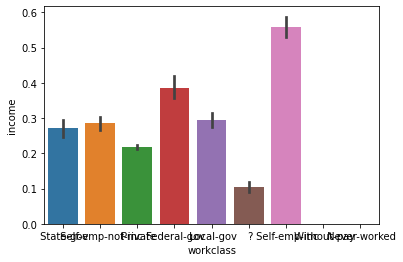

In [351]:
sns.barplot(x='workclass', y = 'income', data=pay_df)

<AxesSubplot:xlabel='education', ylabel='income'>

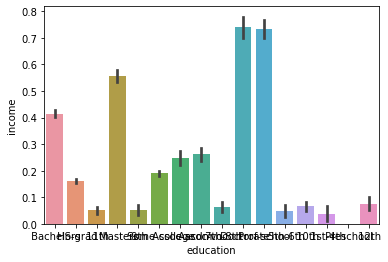

In [352]:
sns.barplot(x='education', y = 'income', data=pay_df)

<AxesSubplot:xlabel='native-country', ylabel='income'>

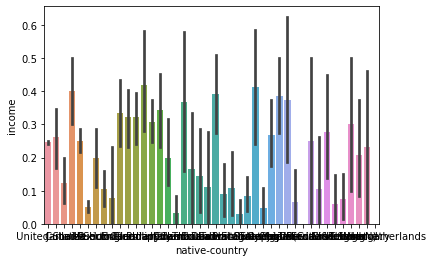

In [353]:
sns.barplot(x='native-country', y = 'income', data=pay_df)

<AxesSubplot:xlabel='race', ylabel='income'>

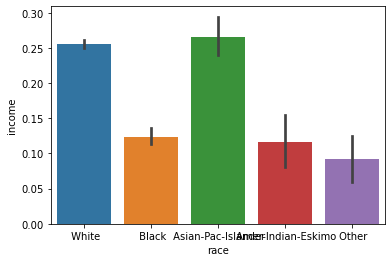

In [354]:
sns.barplot(x='race', y = 'income', data=pay_df)

<AxesSubplot:xlabel='sex', ylabel='income'>

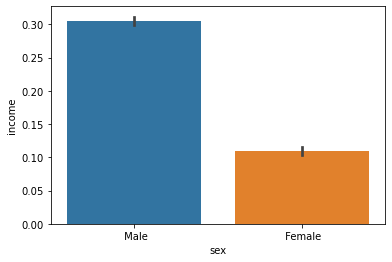

In [355]:
sns.barplot(x='sex', y = 'income', data=pay_df)

In [356]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['sex','income']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

pay_df= encode_features(pay_df)
pay_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  int64 
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 5.0+ MB


In [357]:
pay_df = pd.read_csv('./adult.csv.csv')
y_pay_df = pay_df['income']
X_pay_df= pay_df.drop('income',axis=1)

X_titanic_df = transform_features(X_titanic_df)

FileNotFoundError: [Errno 2] No such file or directory: './adult.csv.csv'

In [358]:
# ##중복값 처리
# print(f'NULL : {pay_df.isnull().sum()}')
# pay_df[pay_df.columns[2]].unique()
# print(type(len(pay_df.columns)))

# for c in range(0, len(pay_df.columns)):
#     print(pay_df.columns ,pay_df[pay_df.columns[c]].unique())
# ? 처리 함수    


# def question(df):
#     df.replace(' ?','None')
#     return df

# #불필요 한 속성 제거
# def drop(df):
#     df.drop(['fnlwgt','education-num','capital-gain','capital-loss'],axis=1, inplace=True)
#     return df
    
# def transform_(df):
#     df = question(df)
#     df = drop(df)
#     return df

# test_df = transform_(pay_df)
for c in range(0, len(test_df.columns)):
    print(test_df.columns ,test_df[pay_df.columns[c]].unique())

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'hours-per-week', 'native-country',
       'income'],
      dtype='object') [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'hours-per-week', 'native-country',
       'income'],
      dtype='object') [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


KeyError: 'fnlwgt'

In [359]:
def question(dataDF):
    for columns in len(dataDF.columns):
        u[columns] = dataDF.unique
        
        
pay_df['income'].unique()
print(len(pay_df.columns))

15
